# What is transfer learning ?

The reuse of a pre-trained model on a new problem is known as transfer learning in machine learning. A machine uses the knowledge learned from a prior assignment to increase prediction about a new task in transfer learning. You could, for example, use the information gained during training to distinguish beverages when training a classifier to predict whether an image contains cuisine.

The knowledge of an already trained machine learning model is transferred to a different but closely linked problem throughout transfer learning. For example, if you trained a simple classifier to predict whether an image contains a backpack, you could use the model’s training knowledge to identify other objects such as sunglasses.

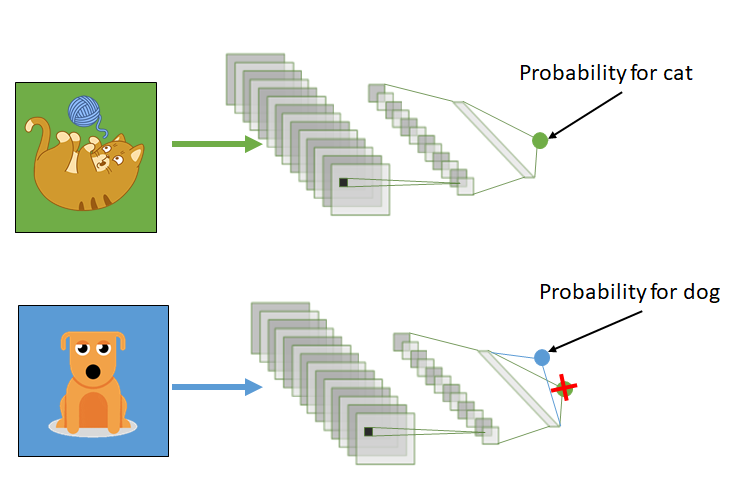

# How does this works ?

In computer vision, neural networks typically aim to detect edges in the first layer, forms in the middle layer, and task-specific features in the latter layers.

The early and central layers are employed in transfer learning, and the latter layers are only retrained. It makes use of the labelled data from the task it was trained on.

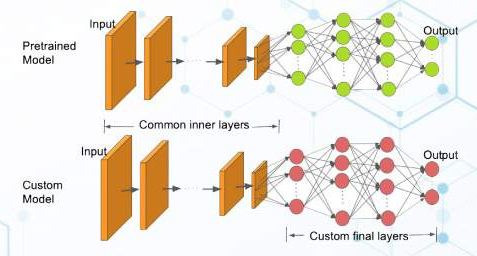

# Some Terminologies that you should know

- **Feature Space** :- In transfer learning, a feature space refers to the representation of input data in a higher-dimensional space where each dimension corresponds to a particular feature or characteristic of the data. The feature space is typically learned through a neural network or another machine learning model.

 - In the context of transfer learning, when a model is pre-trained on a large dataset (source domain) and then fine-tuned on a smaller dataset (target domain), the feature space learned during pre-training contains valuable information about general patterns and features in the data. During fine-tuning, the goal is to transfer this knowledge to the target task by adjusting the parameters of the model to better suit the target domain while preserving the learned feature representations.

- **Marginal Probability :-**
In the context of transfer learning, marginal probability typically refers to the probability of observing a particular class or outcome regardless of the values of other variables. It is often used in statistical and machine learning models to calculate the likelihood of an event occurring without considering the values of other variables.
 - In transfer learning, marginal probability might be relevant when dealing with tasks such as classification, where the goal is to predict the probability of an input belonging to a certain class. For example, if you have a pre-trained model that was trained on a source domain for a classification task, you might be interested in calculating the marginal probability of each class based on the learned feature representations.By estimating the marginal probability of each class, you can gain insights into the distribution of classes in the data and make predictions based on the likelihood of each class occurrence.

 - **Domain :-** In the context of transfer learning, a domain refers to a specific distribution of data characterized by its features, labels, and underlying properties. Each domain represents a particular source of data, which could differ in terms of its characteristics such as the data distribution, data format, or the task it addresses.

    The formula for a domain in transfer learning is not a fixed mathematical equation but rather a conceptual understanding of the source and target datasets. However, we can represent it in a more abstract form:

    $ \text{Domain} = \{ (\mathcal{X}, P(\mathcal{X})) \} $

    $ \text{Task} = \{ ( \mathcal{Y}, P(\mathcal{Y}|\mathcal{X})) \} $

    Where:
    - $\mathcal{X}$ represents the input space, i.e., the features.
    - $\mathcal{X}$ represents the marginal probability distribution of the input features.
    - $\mathcal{Y}$ represents the output space, i.e., the labels or targets.
  - $ (\mathcal{Y}|\mathcal{X}) $ represents the conditional probability distribution of the labels given the input features.



# Types of Transfer Learning

*   **Inductive Learning :-** The Source and Target domains are same but the Tasks are different. Generally used in multitask trainings of regressions and classifications.
*   **Unsupervised Transfering Learning :-** This is same as Inductive learning just the applications are focused on clustering and dimensionality reduction.
*   **Transductive transfer Learning :-** In this case we have similarities between the tasks but the domains are different. One famous application is Domain lactation.



Certainly! Let's prepare notes for each type of transfer learning with practical coded examples on real-world datasets:

### 1. Inductive Transfer Learning:

**Notes:**
- Inductive transfer learning involves retraining a pre-trained model on a related but different target task.
- The pre-trained model's knowledge is transferred to the target task, typically through fine-tuning.
- It's useful when labeled data for the target task is limited, as it leverages knowledge from the source task.
- Commonly used in scenarios like image classification, sentiment analysis, etc., where pre-trained models are fine-tuned on specific domains.

**Practical Example:**
- **Dataset:** CIFAR-10 (source task), Caltech-256 (target task)
- **Model:** Pre-trained ResNet-18
- **Fine-tuning:** Freeze all layers except the last fully connected layer, retrain it on the target dataset.

```python
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

# Load CIFAR-10 as source task
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

source_trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                                download=True, transform=transform)
source_trainloader = torch.utils.data.DataLoader(source_trainset, batch_size=64,
                                                  shuffle=True, num_workers=2)

# Load Caltech-256 as target task
target_trainset = torchvision.datasets.Caltech256(root='./data', download=True, transform=transform)
target_trainloader = torch.utils.data.DataLoader(target_trainset, batch_size=64,
                                                  shuffle=True, num_workers=2)

# Load pre-trained ResNet-18
model = models.resnet18(pretrained=True)

# Freeze all layers except the last fully connected layer
for param in model.parameters():
    param.requires_grad = False

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 256)  # Change the last fully connected layer for the target task

# Train the model on the target task
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

for epoch in range(5):  # Train for 5 epochs as an example
    running_loss = 0.0
    for i, data in enumerate(target_trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(target_trainloader)}")
```

### 2. Unsupervised Transfer Learning:

**Notes:**
- Unsupervised transfer learning involves transferring knowledge from a source domain where labels are available to a target domain where labels are not available.
- It often involves pre-training a model on a large unlabeled dataset and then fine-tuning it on the target task with limited labeled data.
- It's useful when labeled data is scarce or expensive, but unlabeled data is abundant.

**Practical Example:**
- **Dataset:** Pre-train on ImageNet (source domain), Fine-tune on Custom Dataset (target domain)
- **Model:** Pre-trained VGG-16
- **Fine-tuning:** Replace the last fully connected layer and train it on the target dataset.

```python
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

# Load custom dataset (target domain)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

custom_trainset = torchvision.datasets.CustomDataset(root='./data', transform=transform)
custom_trainloader = torch.utils.data.DataLoader(custom_trainset, batch_size=64,
                                                 shuffle=True, num_workers=2)

# Load pre-trained VGG-16
model = models.vgg16(pretrained=True)

# Freeze all layers except the last fully connected layer
for param in model.parameters():
    param.requires_grad = False

num_ftrs = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(num_ftrs, len(custom_trainset.classes))  # Change the last fully connected layer

# Train the model on the custom dataset
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

for epoch in range(5):  # Train for 5 epochs as an example
    running_loss = 0.0
    for i, data in enumerate(custom_trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(custom_trainloader)}")
```

### 3. Transductive Transfer Learning:

**Notes:**
- Transductive transfer learning involves directly transferring knowledge from the source task to the target task without retraining.
- It's useful when the source and target tasks share similar characteristics and there's no need for further adaptation.
- It's commonly used in scenarios where the source and target domains are identical or highly similar.

**Practical Example:**
- **Dataset:** Pre-train on MNIST (source domain), Test on USPS (target domain)
- **Model:** Pre-trained CNN
- **Direct Transfer:** Apply the pre-trained model on the target dataset without retraining.

```python
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

# Load pre-trained model on MNIST
model = ...  # Load pre-trained CNN model on MNIST

# Load USPS dataset (target domain)
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

usps_testset = torchvision.datasets.USPS(root='./data', train=False,
                                          download=True, transform=transform)
usps_testloader = torch.utils.data.DataLoader(usps_testset, batch_size=64,
                                               shuffle=False, num_workers=2)

# Test the pre-trained model on USPS dataset
correct = 0
total = 0
with torch.no_grad():
    for data in usps_testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the pre-trained model on the USPS test images: %d %%' % (
    100 * correct / total))
```

These practical examples illustrate the concepts and implementations of inductive, unsupervised, and transductive transfer learning using real-world datasets and pre-trained models.